In [96]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and preliminary
- import
- removal of single-valued columns
- check for missing values
- check for columns difference between train/test

In [97]:
DATA_FOLDER = 'dataset'
DATASET_TRAIN = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TRAIN.csv')
DATASET_TEST = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TEST.csv')
PREPROCESSED_TRAIN = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TRAIN.csv')
PREPROCESSED_TEST = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TEST.csv')

In [98]:
df_train = pd.read_csv(DATASET_TRAIN)
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [99]:
df_test = pd.read_csv(DATASET_TEST)
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


In [100]:
df_train.shape

(1828, 434)

In [101]:
df_test.shape

(624, 434)

In [102]:
single_value_columns_train = [column for column in df_train.columns if len(df_train[column].unique()) == 1]
len(single_value_columns_train)

52

In [103]:
missing_values_columns_train = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_train)

0

In [104]:
single_value_columns_test = [column for column in df_train.columns if len(df_test[column].unique()) == 1]
len(single_value_columns_test)

50

In [105]:
difference = [column for column in single_value_columns_train if column not in single_value_columns_test]
difference

['zc_q75_w1', 'zc_q75_w2']

In [106]:
missing_values_columns_test = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_test)

0

In [107]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(2452, 434)

In [108]:
df['actor'] = 'actor_' + df['actor'].astype(str)
df['actor'].head()

0    actor_1
1    actor_1
2    actor_1
3    actor_1
4    actor_1
Name: actor, dtype: object

In [109]:
single_value_columns = [column for column in df_train.columns if len(df[column].unique()) == 1]
single_value_columns

['modality',
 'lag1_q50',
 'zc_min',
 'zc_max',
 'zc_q01',
 'zc_q05',
 'zc_q25',
 'zc_q50',
 'zc_q75',
 'zc_q99',
 'stft_max',
 'stft_q95',
 'stft_q99',
 'lag1_q50_w1',
 'zc_min_w1',
 'zc_max_w1',
 'zc_q01_w1',
 'zc_q05_w1',
 'zc_q25_w1',
 'zc_q50_w1',
 'zc_min_w2',
 'zc_max_w2',
 'zc_q01_w2',
 'zc_q05_w2',
 'zc_q25_w2',
 'zc_q50_w2',
 'zc_q99_w2',
 'stft_max_w2',
 'stft_q95_w2',
 'stft_q99_w2',
 'zc_min_w3',
 'zc_max_w3',
 'zc_q01_w3',
 'zc_q05_w3',
 'zc_q25_w3',
 'zc_q50_w3',
 'zc_q75_w3',
 'zc_q99_w3',
 'stft_max_w3',
 'stft_q95_w3',
 'stft_q99_w3',
 'lag1_q50_w4',
 'zc_min_w4',
 'zc_max_w4',
 'zc_q01_w4',
 'zc_q05_w4',
 'zc_q25_w4',
 'zc_q50_w4',
 'stft_max_w4',
 'stft_q99_w4']

In [110]:
to_drop = ['filename'] + single_value_columns
df = df.drop(to_drop, axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


## Distribution correction and transform

### Repeated values
Find repeated values by stationary points of the partition function

In [111]:
from pandas.core.dtypes.common import is_numeric_dtype
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]

# Check for global duplicates
print("global duplicates", np.sum(df.duplicated()))

# Get per-attribute duplicate values and duplicates counts
attr_repeated = dict()
values_counts = pd.DataFrame(columns=["attribute", "value", "counts"])

for attr in numeric_attr_list:

    duplicated = df[attr].duplicated()
    attr_repeated[attr] = np.sum(duplicated)

    # Counts how many times a repeated value is repeatd
    for val in np.unique(df[attr].loc[duplicated]):
        counts = np.sum(df[attr] == val)

        # Threshold for being a real duplicate
        if counts > 0.05*len(df):
            row = dict(attribute=attr, value=val, counts=counts)
            row = pd.DataFrame(row, index=[0])
            values_counts = pd.concat([values_counts, row], ignore_index=True)

display(values_counts.sort_values("counts", ascending=False))

global duplicates 0


,attribute,value,counts
97,zc_q75_w2,0.000000,2451
68,zc_q75_w1,0.000000,2451
148,zc_q75_w4,0.000000,2450
158,stft_q95_w4,1.000000,2446
84,stft_max_w1,1.000000,2435
...,...,...,...
112,q05_w4,-0.000092,123
111,q05_w4,-0.000122,123
92,q50_w2,0.000031,123
98,zc_q95_w2,0.000000,123


Test: drop the highly repeated columns. `TODO`: check if they are correlated with someone.

In [112]:
highly_repeated = values_counts[values_counts.counts > 0.3 * len(df)].attribute.values
print(np.sort(highly_repeated), len(highly_repeated))
df.drop(columns=highly_repeated)

['lag1_mean' 'lag1_q05_w4' 'lag1_q25_w1' 'lag1_q25_w4' 'lag1_q50_w2'
 'lag1_q50_w3' 'lag1_q75' 'lag1_q75_w1' 'lag1_q75_w4' 'lag1_q95_w4'
 'lag1_sum' 'mfcc_q50' 'mfcc_q50_w1' 'q25_w1' 'q25_w4' 'q50' 'q50_w1'
 'q50_w2' 'q50_w4' 'q75_w1' 'q75_w4' 'sc_min' 'sc_min_w1' 'sc_q01'
 'sc_q01_w1' 'sc_q05_w1' 'stft_max_w1' 'stft_min' 'stft_min_w1' 'stft_q01'
 'stft_q01_w1' 'stft_q05_w1' 'stft_q95_w1' 'stft_q95_w4' 'stft_q99_w1'
 'zc_q75_w1' 'zc_q75_w2' 'zc_q75_w4' 'zc_q95' 'zc_q95_w1' 'zc_q95_w2'
 'zc_q95_w3' 'zc_q95_w4' 'zc_q95_w4' 'zc_q99_w1' 'zc_q99_w4'] 46


,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.791036,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.744699,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.751478,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.736895,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.744390,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,song,fearful,normal,Dogs are sitting by the door,2nd,actor_24,F,219419,0.423157,1.928533e-06,...,0.610831,0.301240,0.000496,0.003056,0.014688,0.482438,0.678422,0.834269,-0.495689,-0.746055
2448,song,fearful,strong,Kids are talking by the door,1st,actor_24,F,217817,-1.375854,-6.316562e-06,...,0.536033,0.291831,0.002319,0.003847,0.010327,0.336392,0.544155,0.754146,-0.877851,-0.152447
2449,song,fearful,strong,Kids are talking by the door,2nd,actor_24,F,206606,0.573761,2.777078e-06,...,0.511294,0.297616,0.001602,0.004732,0.016150,0.279892,0.516853,0.729066,-0.997740,-0.003013
2450,song,fearful,strong,Dogs are sitting by the door,1st,actor_24,F,203404,0.792572,3.896541e-06,...,0.595262,0.270272,0.006459,0.019884,0.066764,0.408438,0.615354,0.798053,-0.670500,-0.325276


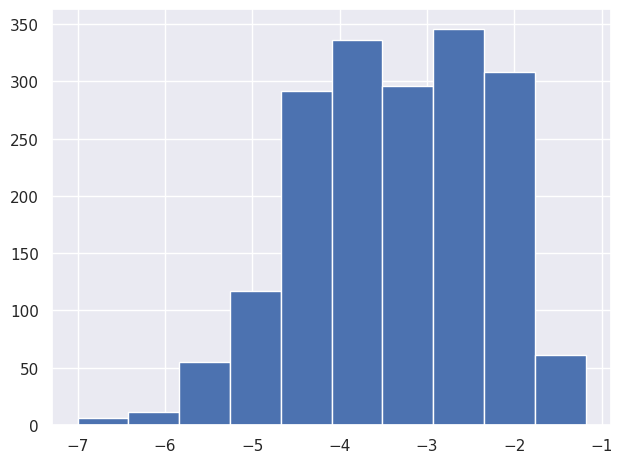

In [113]:
df_train['dummy'] = df_train['std_w1'].copy()
df_train[df_train['dummy'] == 0] = 1e-7
df_train['dummy'] = df_train['dummy'].apply(np.log10)
plt.hist(df_train['dummy'])
plt.show()

In [114]:
from scipy.stats import shapiro

gaussian = []
not_gaussian = []

for i in numeric_attr_list:
    if shapiro(df[i]).pvalue >= 1e-34:
        gaussian.append([i, shapiro(df[i]).pvalue])
    else:
        not_gaussian.append([i, shapiro(df[i]).pvalue])

In [137]:
#gaussian

In [138]:
# not_gaussian

In [120]:
len(df[df['stft_min'] == 0])

1021

In [122]:
# Autoreloads the utils module to prevent from using an outdated version of it
%load_ext autoreload
%autoreload 2

from utils import ridgeline_plot

columns = [col for col in df.columns if col.startswith("mfcc")]

# ridgeline_plot(df, columns, collective_name = "lag1")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Correlated features

### Correlation by prefixes

In [128]:
prefixes = [
    'sum',
    'mean',
    'std',
    'min',
    'max',
    'kur',
    'skew',
    'lag1',
    'zc',
    'mfcc',
    'sc',
    'stft',
    'length',
    'q'
]

In [129]:
def redirect_to_file(filename, str_to_redirect):
    path = os.path.join(DATA_FOLDER, filename)
    with open(path, 'w') as f:
        f.write(str_to_redirect)

In [130]:
corr = df[numeric_attr_list].corr(method='spearman')
display(corr.head())
corr_dict = dict(corr)

deletable_keys = []
for key in corr_dict.keys():
    series = corr_dict[key]
    corr_dict[key] = series[(series.abs() > 0.95)].drop(key) # Drops the autocorrelation
    if len(corr_dict[key]) == 0:
        deletable_keys.append(key)

# Remove empty boyz
for key in deletable_keys:
    del corr_dict[key]

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
frame_count,1.000000,0.036158,0.045056,0.321882,-0.190115,0.180520,-0.292354,-0.374691,-0.703040,0.004680,...,0.734667,-0.692240,-0.687681,-0.734732,-0.624345,-0.481688,-0.384810,-0.060742,-0.426852,0.101367
sum,0.036158,1.000000,0.999025,0.176411,-0.163471,0.175029,-0.165350,-0.165067,-0.128933,0.011284,...,0.021214,-0.039195,-0.036044,-0.024901,-0.036056,-0.047771,-0.071233,0.020005,-0.019858,0.033417
mean,0.045056,0.999025,1.000000,0.177691,-0.163964,0.175345,-0.166422,-0.166983,-0.132294,0.011218,...,0.028308,-0.046425,-0.043410,-0.031805,-0.042469,-0.052980,-0.075647,0.017848,-0.024217,0.034715
std,0.321882,0.176411,0.177691,1.000000,-0.961377,0.954496,-0.997091,-0.992325,-0.687525,0.066223,...,0.284948,-0.233518,-0.231862,-0.276888,-0.327142,-0.343688,-0.296157,0.010408,-0.212029,0.173978
min,-0.190115,-0.163471,-0.163964,-0.961377,1.000000,-0.984137,0.967421,0.929302,0.576906,-0.063732,...,-0.149351,0.099010,0.093872,0.134361,0.224607,0.272729,0.239599,-0.026023,0.139807,-0.167532


In [131]:
corr_by_prefixes = dict()

for prefix in prefixes:
    corr_by_prefixes[prefix] = dict()
    for key in corr_dict.keys():
        if key.startswith(prefix):
            corr_by_prefixes[prefix][key] = corr_dict[key]


In [132]:
to_write = ''

for prefix in corr_by_prefixes.keys():
    to_write += f'COLUMNS STARTING WITH PREFIX {prefix}:\n\n'

    for column in corr_by_prefixes[prefix].keys():
        series = corr_by_prefixes[prefix][column]

        to_write += f'\n\tCorrelated with {column}:\n'
        to_write += str(series) + '\n'

    to_write += '\n\n'

redirect_to_file('correlated_features.txt', to_write)

### Global correlation network

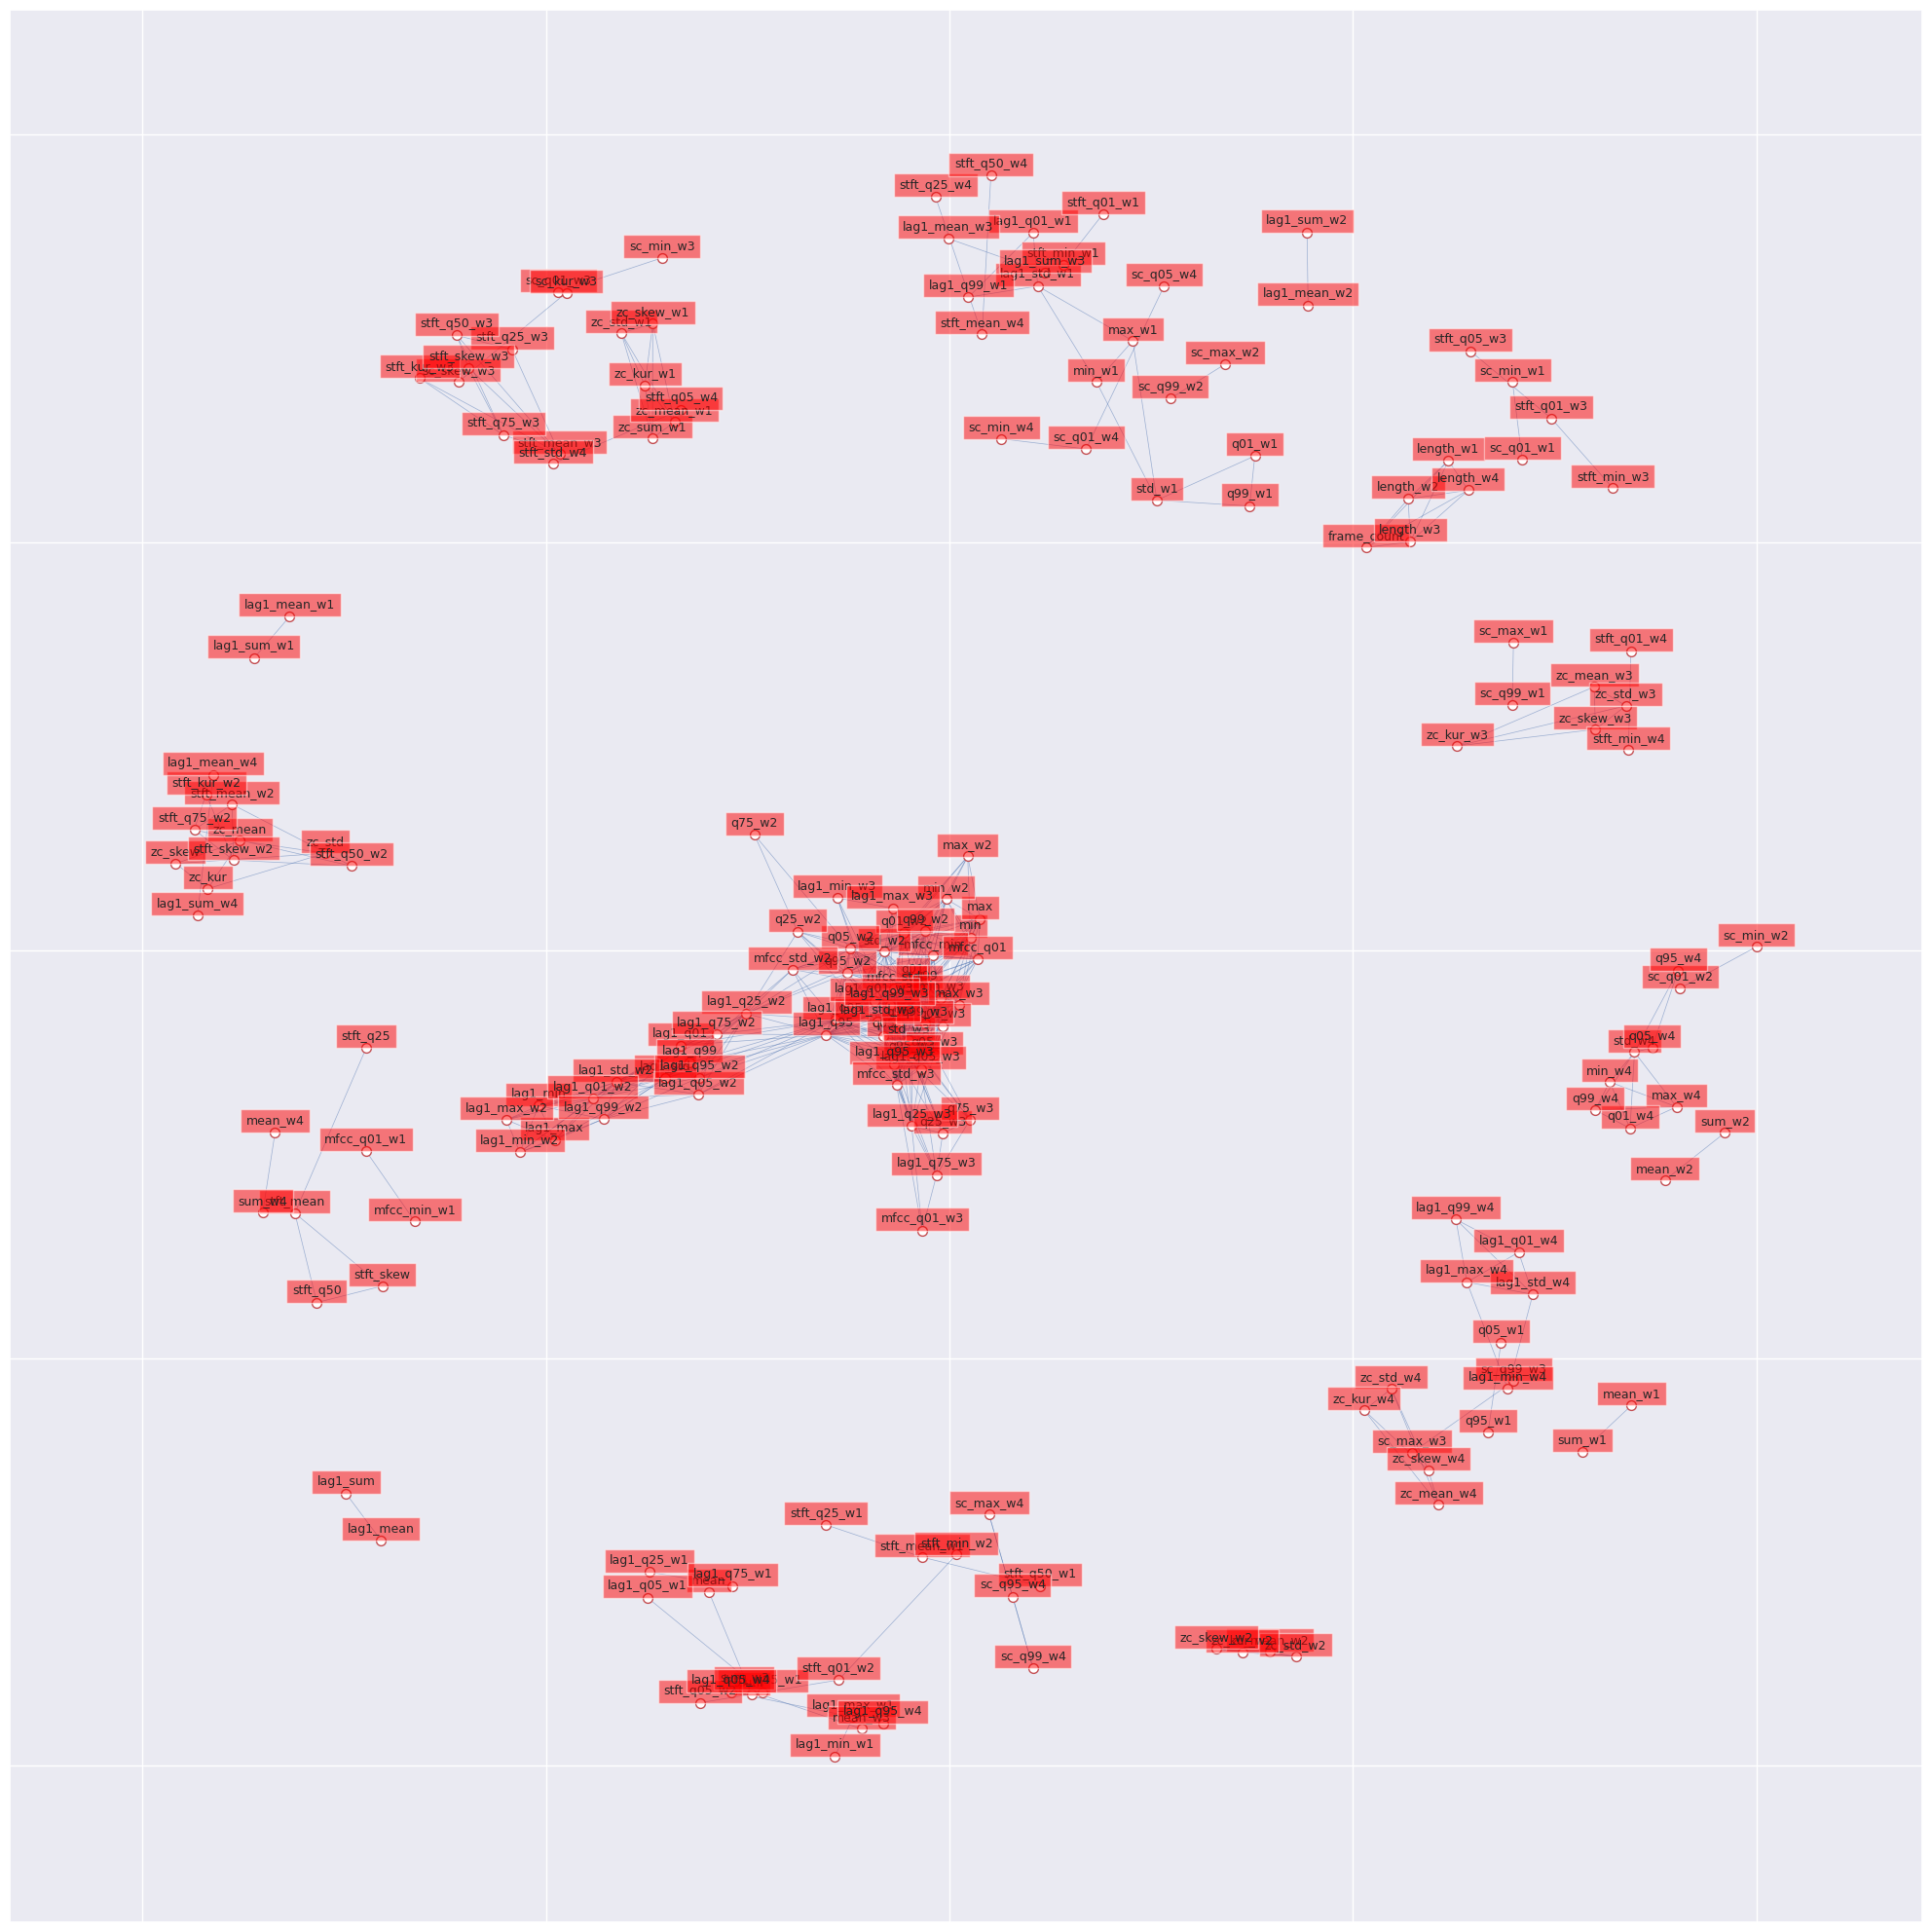

In [133]:
correlation_network = dict()

for attribute in corr_dict.keys():
    correlation_network[attribute] = dict()
    for other_attribute in corr_dict[attribute].index.values:
        correlation_network[attribute][other_attribute] = dict(weight=np.abs(corr_dict[attribute][other_attribute]))
# display(correlation_network)

import networkx as nx
plt.figure(figsize=(20,20))

G = nx.from_dict_of_dicts(correlation_network)
pos = nx.spring_layout(G, k=0.2)#nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_shape="o", node_size=50, edgecolors="r", node_color="w")
nx.draw_networkx_edges(
    G, pos,
    # arrows=True,
    width=0.5,
    edge_color ="b",
    alpha=0.5,
    # connectionstyle="arc3,rad=0.1"  # <-- THIS IS IT
)

# labels = {key:key for key in correlation_network.keys()}
# nx.draw_networkx_labels(G, pos, font_size=12, font_color="k");
for node in pos.keys():
    plt.text(pos[node][0], pos[node][1] + 0.01, s=node, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center', size=9)


### Correlation by window

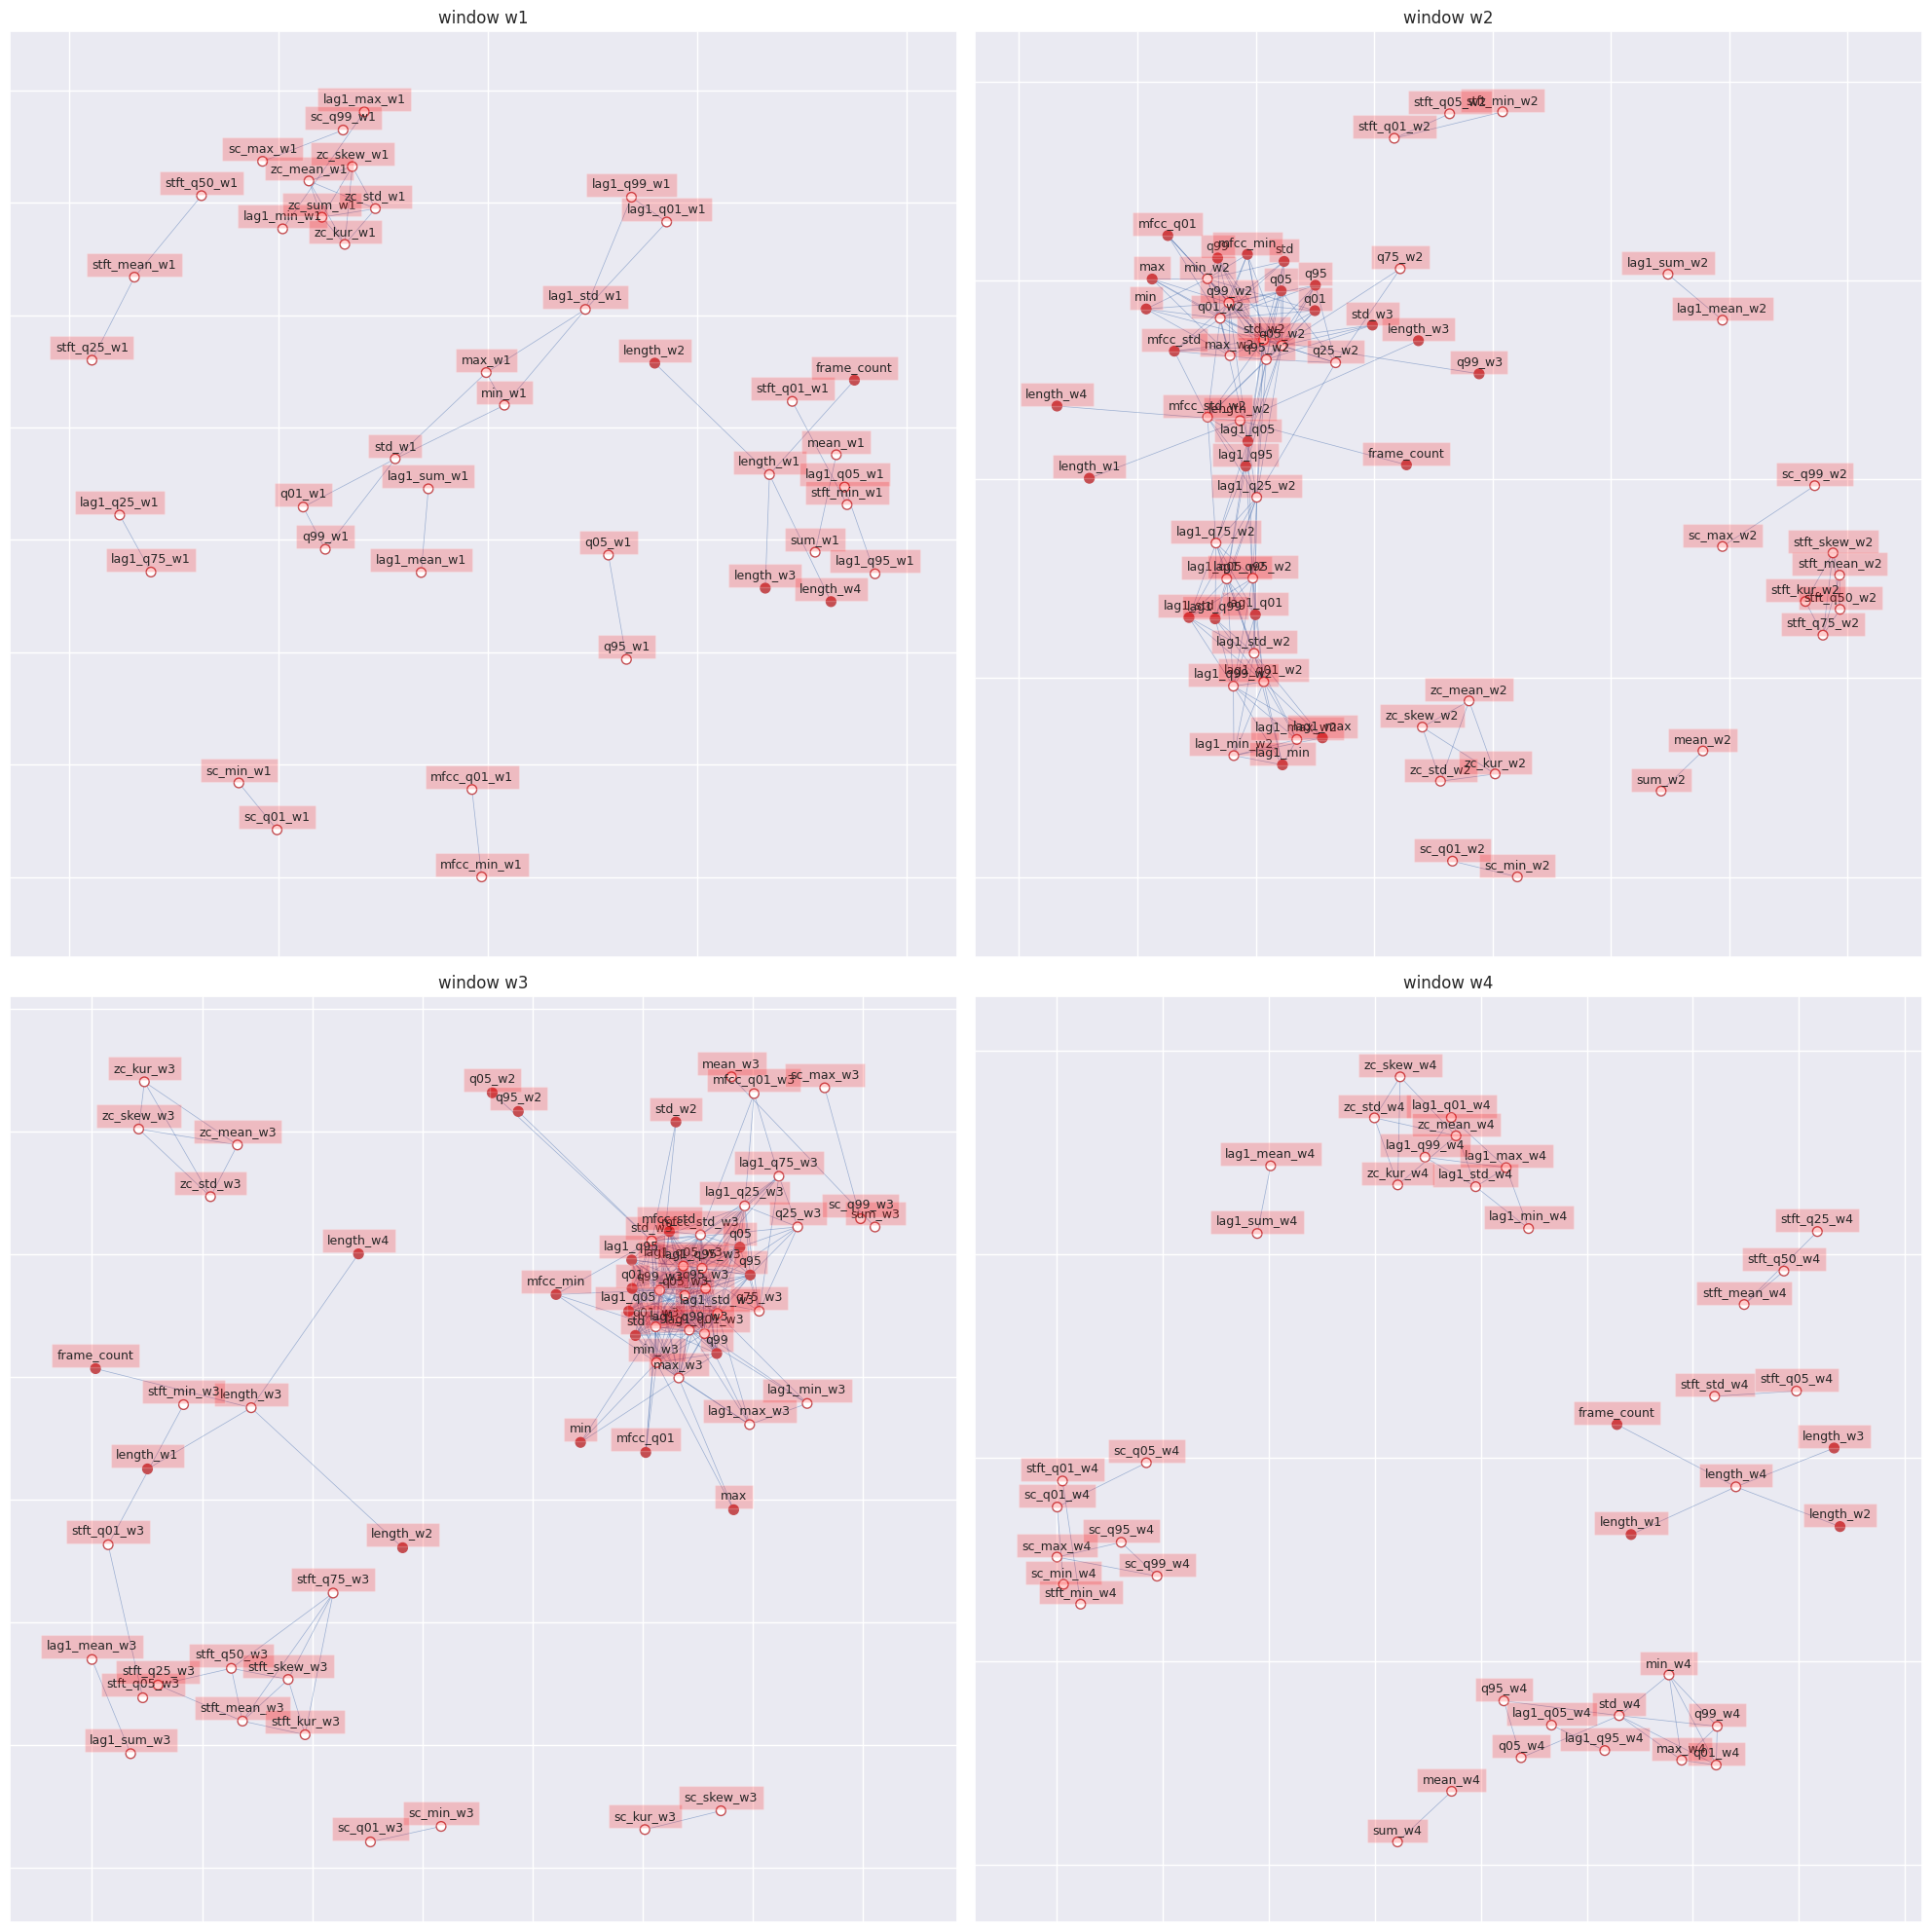

In [134]:
corr_by_window = dict()
for window in ["w1", "w2", "w3", "w4"]:
    corr_by_window[window] = dict()
    for attribute in corr_dict.keys():
        if attribute.endswith(window):
            corr_by_window[window][attribute] = dict()
            for other_attribute in corr_dict[attribute].keys():
                corr_by_window[window][attribute][other_attribute] = dict(weight = np.abs(corr_dict[attribute][other_attribute]),
                                                                          )


# display(correlation_network_by_window)
fig, axes = plt.subplots(2,2,figsize=(20,20))
axes = axes.flatten()
for window, ax in zip(["w1", "w2", "w3", "w4"], axes):

    G = nx.from_dict_of_dicts(corr_by_window[window])
    pos = nx.spring_layout(G, k=0.4)#nx.kamada_kawai_layout(G)
    node_colors = ["w" if u.endswith(window) else "r" for u in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_shape="o", node_size=50, edgecolors="r", node_color=node_colors, ax=ax)
    nx.draw_networkx_edges(
        G, pos,
        # arrows=True,
        width=0.5,
        edge_color ="b",
        alpha=0.5,
        # connectionstyle="arc3,rad=0.1"  # <-- THIS IS IT
        ax=ax
    )
    ax.set_title(f"window {window}")
    # nx.draw_networkx_labels(G, pos,  font_size=8, font_color="k", ax=ax, label_pos=0.75);
    for node in pos.keys():
        ax.text(pos[node][0],pos[node][1] + 0.02,s=node, bbox=dict(facecolor='red', alpha=0.2),horizontalalignment='center', size=9)


Now (for each window) remove the highly correlated features (take one representative attribute for each subgraph).

For each subgraph takes the most well-distibuted attribute using the ``saphiro`` estimation.

In [135]:
representatives = dict()
representatives_graph = dict()

for window in corr_by_window.keys():
    G = nx.from_dict_of_dicts(corr_by_window[window])

    for connected_group in nx.connected_components(G):
        p_values = np.zeros(len(connected_group))
        for i, feature in enumerate(connected_group):
            p_values[i] = shapiro(df[feature]).pvalue
        winner  = list(connected_group)[np.argmax(p_values)]
        key     = tuple(np.sort(list(connected_group)))
        representatives[key] = winner

        representatives_graph[winner] = dict()
        for k in connected_group:
            if k != winner:
                representatives_graph[winner][k] = dict(weight=1.0)

print(representatives)
print(representatives_graph)

{('frame_count', 'length_w1', 'length_w2', 'length_w3', 'length_w4'): 'length_w2', ('mean_w1', 'sum_w1'): 'mean_w1', ('lag1_q01_w1', 'lag1_q99_w1', 'lag1_std_w1', 'max_w1', 'min_w1', 'q01_w1', 'q99_w1', 'std_w1'): 'std_w1', ('q05_w1', 'q95_w1'): 'q95_w1', ('lag1_mean_w1', 'lag1_sum_w1'): 'lag1_mean_w1', ('lag1_max_w1', 'lag1_min_w1'): 'lag1_max_w1', ('lag1_q05_w1', 'lag1_q95_w1'): 'lag1_q05_w1', ('lag1_q25_w1', 'lag1_q75_w1'): 'lag1_q25_w1', ('zc_kur_w1', 'zc_mean_w1', 'zc_skew_w1', 'zc_std_w1', 'zc_sum_w1'): 'zc_mean_w1', ('mfcc_min_w1', 'mfcc_q01_w1'): 'mfcc_q01_w1', ('sc_min_w1', 'sc_q01_w1'): 'sc_q01_w1', ('sc_max_w1', 'sc_q99_w1'): 'sc_q99_w1', ('stft_mean_w1', 'stft_q25_w1', 'stft_q50_w1'): 'stft_mean_w1', ('stft_min_w1', 'stft_q01_w1'): 'stft_q01_w1', ('mean_w2', 'sum_w2'): 'sum_w2', ('lag1_max', 'lag1_max_w2', 'lag1_min', 'lag1_min_w2', 'lag1_q01', 'lag1_q01_w2', 'lag1_q05', 'lag1_q05_w2', 'lag1_q25_w2', 'lag1_q75_w2', 'lag1_q95', 'lag1_q95_w2', 'lag1_q99', 'lag1_q99_w2', 'lag1

In [136]:
df_decorrelated = df.copy()
display(df.head())
for redundant in representatives.keys():
    for attr in redundant:
        try:
            df_decorrelated.drop(columns = [attr], inplace=True)
        except KeyError:
            print(f"Error: {attr}")
len(df_decorrelated.columns)

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


Error: lag1_q05
Error: lag1_q95
Error: max
Error: mfcc_min
Error: mfcc_q01
Error: mfcc_std
Error: min
Error: q01
Error: q05
Error: q05_w2
Error: q95
Error: q95_w2
Error: q99
Error: q99_w3
Error: std
Error: std_w2
Error: std_w3


208

## Mutual information

In [142]:
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]
categoric_attr_list = [column for column in df.columns if not is_numeric_dtype(df[column])]
categoric_attr_list

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'sex']

In [143]:
df_binned = pd.DataFrame(columns=numeric_attr_list)
for column in numeric_attr_list:

    try:
        df_binned[column] = pd.qcut(df[column], q=10)
    except ValueError:
        print(column, file=sys.stderr, end=" ")

q50 lag1_sum lag1_mean lag1_q25 lag1_q75 zc_q95 mfcc_q50 mfcc_q75 sc_min sc_q01 sc_q05 stft_min stft_q01 stft_q05 q05_w1 q25_w1 q50_w1 q75_w1 q95_w1 lag1_sum_w1 lag1_mean_w1 lag1_q01_w1 lag1_q05_w1 lag1_q25_w1 lag1_q75_w1 lag1_q95_w1 lag1_q99_w1 zc_q75_w1 zc_q95_w1 zc_q99_w1 mfcc_min_w1 mfcc_q01_w1 mfcc_q25_w1 mfcc_q50_w1 mfcc_q75_w1 sc_min_w1 sc_q01_w1 sc_q05_w1 sc_q25_w1 sc_q50_w1 stft_min_w1 stft_max_w1 stft_q01_w1 stft_q05_w1 stft_q25_w1 stft_q50_w1 stft_q95_w1 stft_q99_w1 q50_w2 lag1_q50_w2 zc_q75_w2 zc_q95_w2 q50_w3 lag1_q50_w3 zc_q95_w3 q25_w4 q50_w4 q75_w4 lag1_q01_w4 lag1_q05_w4 lag1_q25_w4 lag1_q75_w4 lag1_q95_w4 lag1_q99_w4 zc_q75_w4 zc_q95_w4 zc_q99_w4 stft_q95_w4 

In [144]:
df_binned = df_binned.dropna(axis=1, how='all')

In [145]:
from sklearn.metrics import adjusted_mutual_info_score as ami

df_ami = pd.DataFrame(columns=['num', 'cat', 'ami'])
for column_i in df_binned.columns:
   for column_j in categoric_attr_list:
       row = dict(num=column_i, cat=column_j, ami=ami(df_binned[column_i], df[column_j]))
       row = pd.DataFrame(row, index=[0])
       df_ami = pd.concat([df_ami, row])

ami_csv_path = os.path.join(DATA_FOLDER, 'df_ami.csv')
df_ami.to_csv(ami_csv_path, index=False)

# Since my pc takes 2 mins to compute the ami_df
# save and read

df_ami = pd.read_csv(ami_csv_path)
df_ami

,num,cat,ami
0,frame_count,vocal_channel,0.294869
1,frame_count,emotion,0.071042
2,frame_count,emotional_intensity,0.017733
3,frame_count,statement,0.000488
4,frame_count,repetition,-0.000509
...,...,...,...
2151,stft_skew_w4,emotional_intensity,0.004788
2152,stft_skew_w4,statement,-0.000400
2153,stft_skew_w4,repetition,0.000556
2154,stft_skew_w4,actor,0.051081


Now build the graph of ami

Graph with 191 nodes and 236 edges


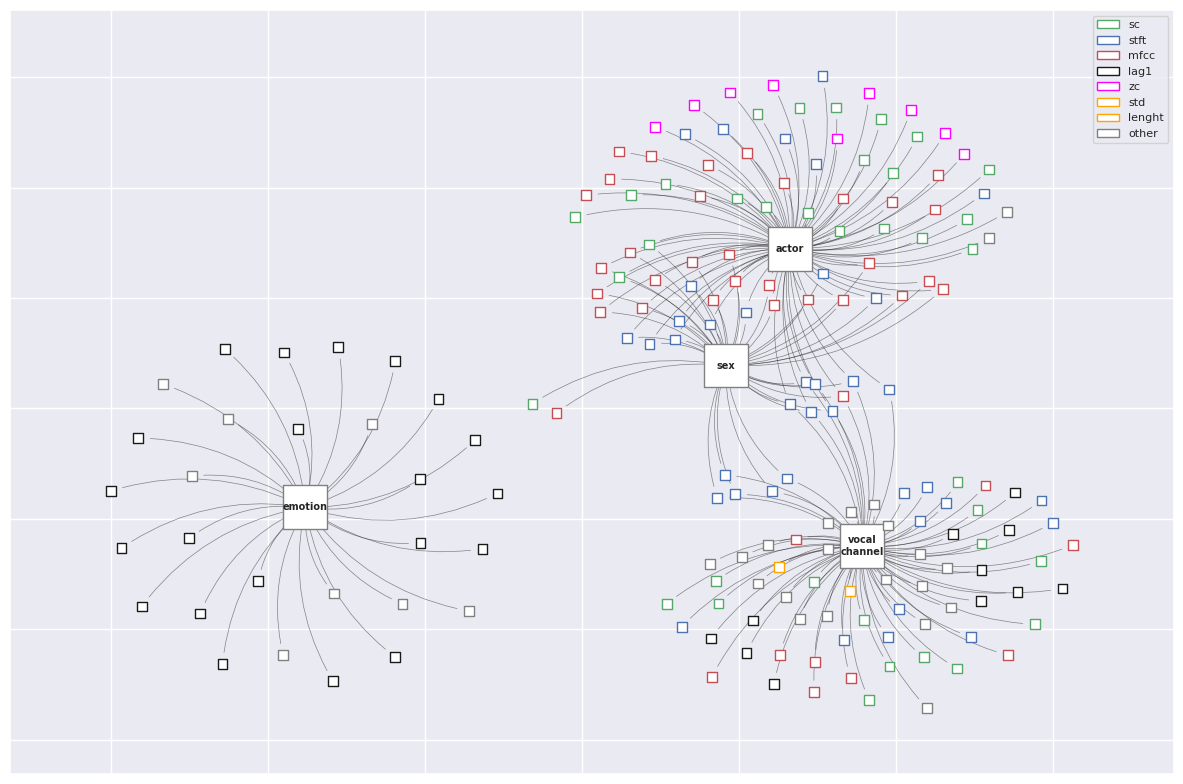

In [ ]:
import networkx as nx

################ DF to adjacency dict #################
ami_network = dict()
highest_ami = df_ami[df_ami.ami > 0.11]
for cat in np.unique(highest_ami.cat):
    ami_network[cat] = dict()
    for num in highest_ami[highest_ami.cat == cat].num:
        # Using a kamada-kawai embedding weight is approx. distance
        # more ami => less distance
        ami_network[cat][num] = dict(weight=0.02/highest_ami[(highest_ami.cat == cat)&(highest_ami.num == num)].ami.values[0] + 0.1)

################ Network embedding #####################
G = nx.from_dict_of_dicts(ami_network)
print(G)
pos = nx.kamada_kawai_layout(G)

################ Colors using the prefx of numerical feature #################
color_map = dict(sc="g", stft="b", mfcc="r", lag1="k", zc="magenta", std="orange", lenght="orange")
classes = [label.split("_")[0] for label in pos.keys()]
colors = list(map( lambda x: color_map.get(x, "gray"), classes ))

############### Bigger sizes for categories ##################
sizes = [50 if key not in np.unique(highest_ami.cat) else 1000 for key in pos.keys()]

plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(G, pos, node_shape="s", node_size=sizes, edgecolors=colors, node_color="w")
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    width=0.5,
    edge_color ="k",
    alpha=0.5,
    connectionstyle="arc3,rad=0.2" 
)

############ Text for categories #############
for cat in np.unique(highest_ami.cat):
    if cat in pos.keys():
        s = "\n".join(cat.split("_"))
        plt.text(pos[cat][0], pos[cat][1], s=s, horizontalalignment='center', verticalalignment="center", size=7, fontweight='bold')

########### Legend #############
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='w', edgecolor=color_map[key], label=key) for key in color_map.keys()]
legend_elements.append(Patch(facecolor='w', edgecolor="gray", label="other"))
plt.legend(handles=legend_elements, loc='best', fontsize=8);